#Habilitar Google drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Importar Librerias 

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


#Cargar clasificador haar 

In [0]:
face_cascade= cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml');
img = cv2.imread("/content/drive/My Drive/IA/Computer_vision/Images/caras.jpg")
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Identificar rostros en la imagen (detectMultiScale)

In [0]:
faces = face_cascade.detectMultiScale(grayimg,scaleFactor=1.1,minNeighbors=5,minSize=(30,30))
print(faces)

# Dibujamos rectángulos de color verde sobte las img

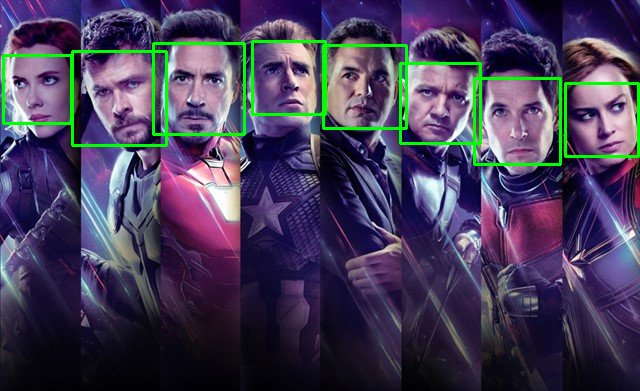

In [5]:
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv2_imshow(img)   



##Nombrar Caras

[[252  42  73  73]
 [  2  54  69  69]
 [150  42  96  96]
 [320  42  85  85]
 [ 76  54  89  89]
 [397  61  85  85]
 [474  78  87  87]
 [569  84  69  69]]


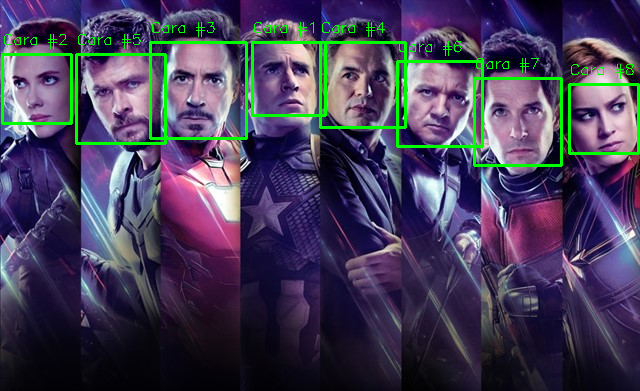

True

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml');
img = cv2.imread("/content/drive/My Drive/IA/Computer_vision/Images/caras.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray,1.3,2);
print(faces)
idx=0
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  idx += 1
  cv2.putText(img,"Cara #{}".format(idx),(x,y-10),
  cv2.FONT_HERSHEY_SIMPLEX,.5,(0,255,0),1)
cv2_imshow(img)
cv2.imwrite('/content/drive/My Drive/IA/Computer_vision/Images/carasDetectadas.jpg',img)

#Trabajar con videos


##Ver video

In [0]:

from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/drive/My Drive/IA/Computer_vision/Images/familia_cantando.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

##Cargar video con opencv
 

In [0]:
videoentrada = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_vision/Images/familia_cantando.mp4')

##Conocer caracteristicas

In [27]:
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
totalframes = int(cv2.VideoCapture.get(videoentrada, property_id))
print( "total de frames: "+str(totalframes) )
print(str(videoentrada.get(3))+"x"+str(videoentrada.get(4))+" pixeles")

total de frames: 1412
640.0x360.0 pixeles


###Extraer frames

In [0]:
#recorremos los 6 primeros frames de 1412

for x in range(6):
  videoentrada.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = videoentrada.read()
  #convertimos el frame a gris
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #detectamos las caras en el frame
  faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
  for (x, y, w, h) in faces:
    #dibujamos rectángulos verdes alrededor de las caras
    cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
  cv2_imshow(frame)


##Exportar video 

In [30]:
pip install pyprind

In [0]:

import sys
import time          #  calcular tiempo (en este caso tiempo de descarga de archivo)
import pyprind
#funcion para ver el avance de procesos en background
def reporthook(step, total_step):
    global start_time
    if step == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    speed = total_step / (1024.**2 * duration)
    percent = step *100 /total_step
    sys.stdout.write("\r %d frames  | %d segundos transcurrido" %
                    (percent, duration))
    sys.stdout.flush()


In [39]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_vision/Python_files/HaarCascade/haarcascade_frontalface_default.xml')
#video que analizaremos
videoentrada = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_vision/Images/familia_cantando.mp4')
#video resultante del análisis, definimos el codec DIVX
codec = cv2.VideoWriter_fourcc(*'DIVX')
# Definimos el fps = 20.0 y el tamaño de cada frame (640x360)
videosalida = cv2.VideoWriter('/content/drive/My Drive/IA/Computer_vision/Images/familia_cantando_haar2.avi',
                              codec, 30.0,(640,360))
framenum=0
while (videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x,y,w,h) in faces:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    videosalida.write(frame)
    reporthook(framenum, 1412)
    framenum=framenum+1
  else: break
videoentrada.release()
videosalida.release()


 99 frames  | 231 segundos transcurrido

#Taller

##Traer video

In [0]:
videoentrada1 = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_vision/Images/personasCaminano.mp4')

##Conocer caracteristicas

In [42]:
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
totalframes = int(cv2.VideoCapture.get(videoentrada1, property_id))
print( "total de frames: "+str(totalframes) )
print(str(videoentrada1.get(3))+"x"+str(videoentrada1.get(4))+" pixeles")


total de frames: 552
1280.0x720.0 pixeles


In [0]:
body_cascade= cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_vision/Python_files/HaarCascade/haarcascade_fullbody.xml');
for x in range(10):
  videoentrada1.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = videoentrada1.read()
  #convertimos el frame a gris
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #detectamos las caras en el frame
 
  bodys = body_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
  #faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
  for (x, y, w, h) in bodys:
    #dibujamos rectángulos verdes alrededor de las caras
    cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
  cv2_imshow(frame)

In [59]:
body_cascade= cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_vision/Python_files/HaarCascade/haarcascade_fullbody.xml');
#video que analizaremos
videoentrada1 = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_vision/Images/personasCaminano.mp4')
#video resultante del análisis, definimos el codec DIVX
codec = cv2.VideoWriter_fourcc(*'DIVX')
# Definimos el fps = 20.0 y el tamaño de cada frame (640x360)
videosalida = cv2.VideoWriter('/content/drive/My Drive/IA/Computer_vision/Images/personasCaminano_haar.avi',
                              codec, 30.0,(1280,720))
framenum=0
while (videoentrada1.isOpened()):
  ret, frame = videoentrada1.read()
  if ret == True:
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    bodys =body_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x,y,w,h) in bodys:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    videosalida.write(frame)
    reporthook(framenum, 552)
    framenum=framenum+1
  else: break
videoentrada1.release()
videosalida.release()

 99 frames  | 318 segundos transcurrido